# DT-RF-XGBOOST Inclass

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_pickle("saved_df.pkl")

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               707 non-null    int64  
 1   Glucose                   707 non-null    int64  
 2   BloodPressure             707 non-null    int64  
 3   SkinThickness             707 non-null    int64  
 4   Insulin                   707 non-null    int64  
 5   BMI                       707 non-null    float64
 6   DiabetesPedigreeFunction  707 non-null    float64
 7   Age                       707 non-null    int64  
 8   Outcome                   707 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.2 KB


In [46]:
df.shape

(707, 9)

<AxesSubplot:>

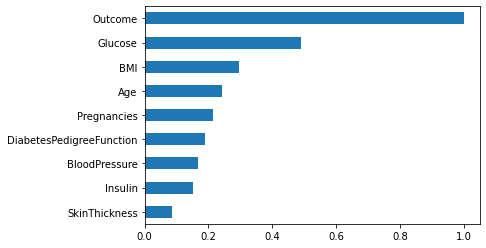

In [3]:
df.corr()["Outcome"].sort_values().plot.barh()

In [47]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [48]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



## DECISION TREE 

In [50]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [51]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [52]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        94
           1       0.53      0.44      0.48        48

    accuracy                           0.68       142
   macro avg       0.63      0.62      0.62       142
weighted avg       0.66      0.68      0.67       142



## RANDOM FOREST

In [53]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [54]:
y_pred=rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[82, 12],
       [21, 27]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        94
           1       0.69      0.56      0.62        48

    accuracy                           0.77       142
   macro avg       0.74      0.72      0.73       142
weighted avg       0.76      0.77      0.76       142



## FR TUNNING

In [56]:
rf = RandomForestClassifier()

In [57]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [58]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.1min finished


In [60]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 50}

In [61]:
rf_tuned = RandomForestClassifier(max_depth = 9,             
                                  max_features = 3, 
                                  min_samples_split = 4, 
                                  n_estimators = 1000).fit(X_train, y_train)

In [62]:
y_pred=rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[82, 12],
       [20, 28]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        94
           1       0.70      0.58      0.64        48

    accuracy                           0.77       142
   macro avg       0.75      0.73      0.74       142
weighted avg       0.77      0.77      0.77       142



In [64]:
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

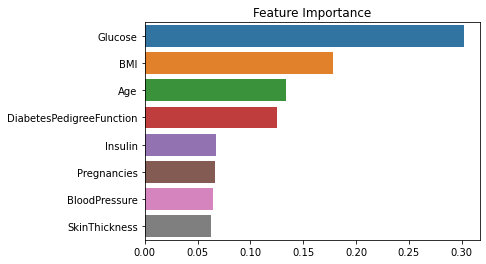

In [65]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## XGBOOST

In [30]:
!pip install xgboost

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [68]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



## TUNNING XGBOOST

In [77]:
xgb = XGBClassifier()

In [78]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [79]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   37.6s finished


In [80]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1}

In [82]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 500, 
                                subsample= 0.8).fit(X_train, y_train)

In [83]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[81, 13],
       [21, 27]], dtype=int64)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        94
           1       0.68      0.56      0.61        48

    accuracy                           0.76       142
   macro avg       0.73      0.71      0.72       142
weighted avg       0.75      0.76      0.75       142



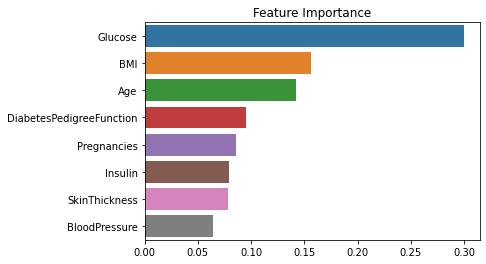

In [85]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()